# Clasificación de Calidad del Aire

1. Preparación de Datos
2. División de los datos 70-30
3. Aprendizaje del Modelo: Tree, Knn, NN, SVM, RandomForest
4. Evaluación del Modelo: matriz de confusion, P,R, ROC
5. Guardar el modelo

* El despliegue se realiza en otro jupyter_notebook

In [ ]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

1. Preparación de los datos

In [ ]:
#Cargamos los datos
data = pd.read_csv("datos_numéricos.csv")
data.head()

,Unnamed: 0,Temperature,Humidity,PM10,NO2,SO2,CO,Population_Density,Air Quality
0,0,29.8,59.1,17.9,18.9,9.2,1.72,319,Moderate
1,1,28.3,75.6,12.2,30.8,9.7,1.64,611,Moderate
2,2,23.1,74.7,33.8,24.4,12.6,1.63,619,Moderate
3,3,27.1,39.1,6.3,13.5,5.3,1.15,551,Good
4,4,26.5,70.7,16.0,21.9,5.6,1.01,303,Good


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
data.describe()

,Unnamed: 0,Temperature,Humidity,PM10,NO2,SO2,CO,Population_Density
count,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3999.50000,32.51725,75.046662,37.827120,29.850787,12.611757,1.748817,545.418250
std,2309.54541,7.44217,16.830154,32.092128,9.834505,7.761405,0.610075,160.523109
min,0.00000,13.40000,36.000000,0.000000,7.400000,0.000000,0.650000,188.000000
25%,1999.75000,26.80000,62.900000,15.999979,22.700000,6.300000,1.170000,429.000000
50%,3999.50000,31.80000,75.150000,28.800000,29.100000,11.200000,1.710000,545.000000
75%,5999.25000,37.62500,86.300000,49.500000,36.700000,17.400000,2.210000,662.000000
max,7999.00000,58.60000,128.100000,315.800000,64.900000,44.900000,3.720000,957.000000


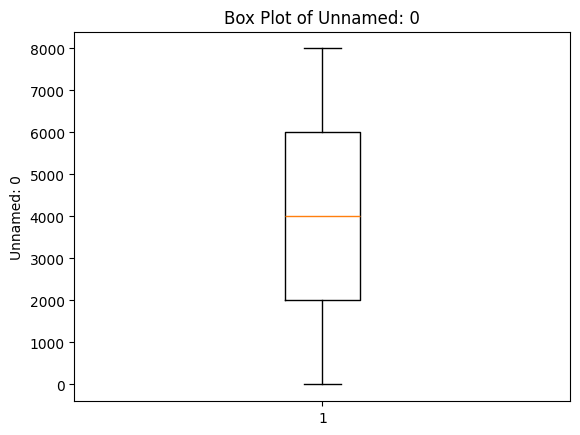

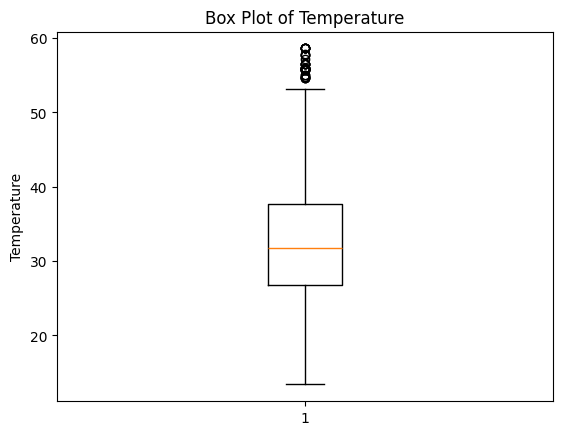

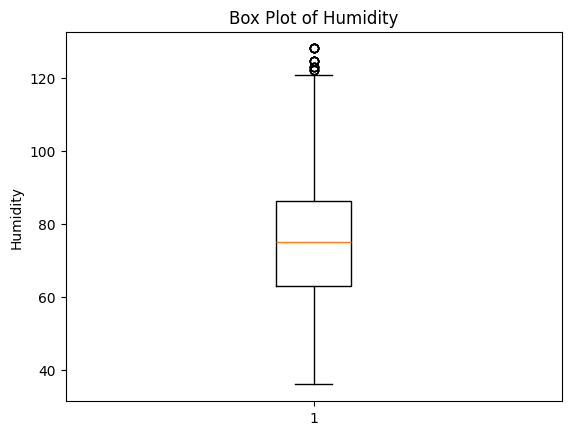

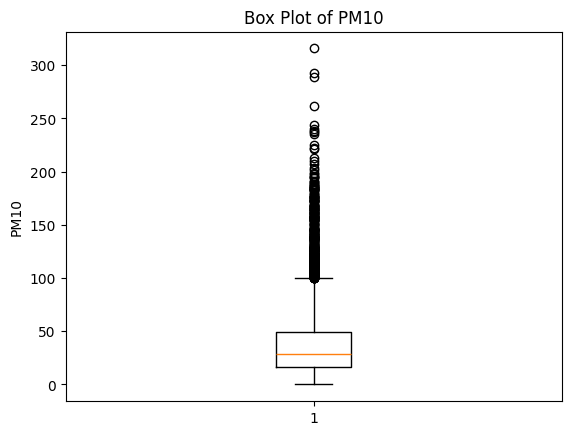

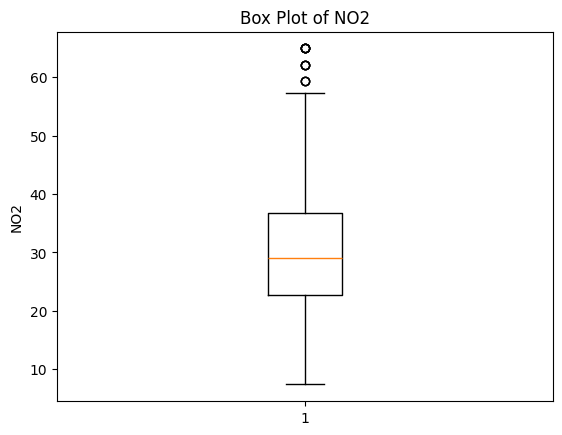

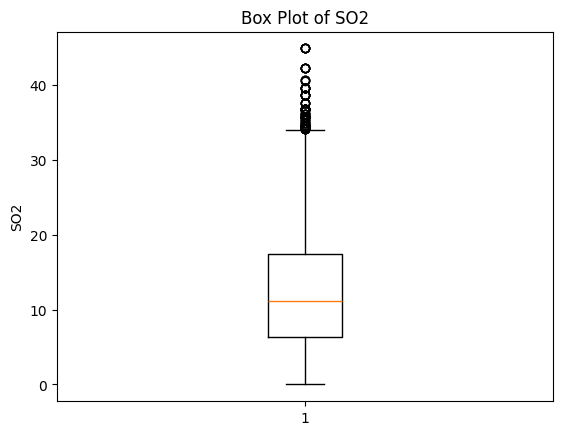

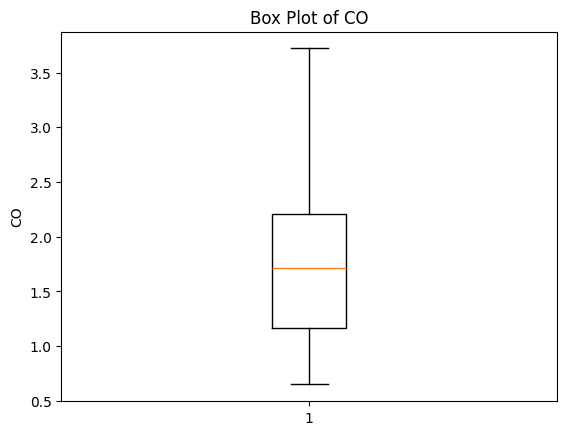

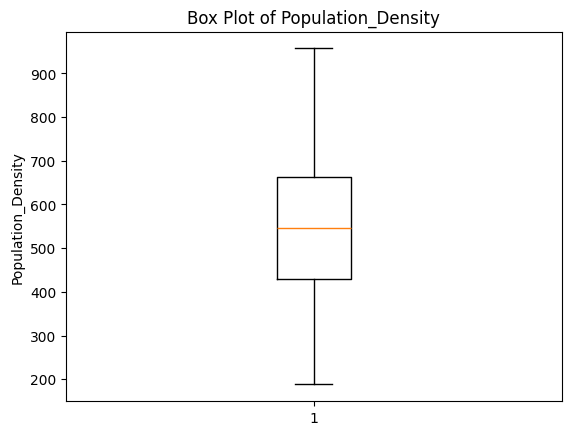

In [ ]:
# Seleccionar columnas numéricas
numerical_cols = data.select_dtypes(include=['number']).columns
# Crear boxplots individuales
for col in numerical_cols:
    fig, ax = plt.subplots()  # Crear una nueva figura y ejes
    ax.boxplot(data[col].dropna())  # Eliminar NaN si hay
    ax.set_title(f'Box Plot of {col}')
    ax.set_ylabel(col)
    plt.show()


<Axes: ylabel='count'>

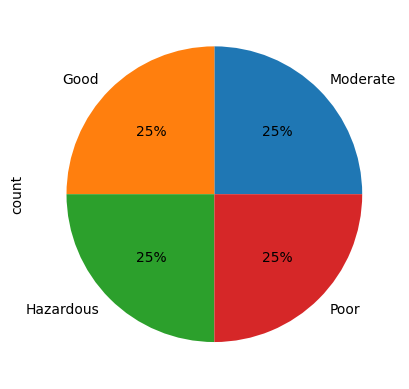

In [ ]:
data['Air Quality'].value_counts().plot(kind='pie', autopct='%.0f%%')

In [ ]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Air Quality"]=labelencoder.fit_transform(data["Air Quality"]) #Objetivo

data.head()

,Unnamed: 0,Temperature,Humidity,PM10,NO2,SO2,CO,Population_Density,Air Quality
0,0,29.8,59.1,17.9,18.9,9.2,1.72,319,2
1,1,28.3,75.6,12.2,30.8,9.7,1.64,611,2
2,2,23.1,74.7,33.8,24.4,12.6,1.63,619,2
3,3,27.1,39.1,6.3,13.5,5.3,1.15,551,0
4,4,26.5,70.7,16.0,21.9,5.6,1.01,303,0


# 2. División 70-30

<Axes: xlabel='Air Quality'>

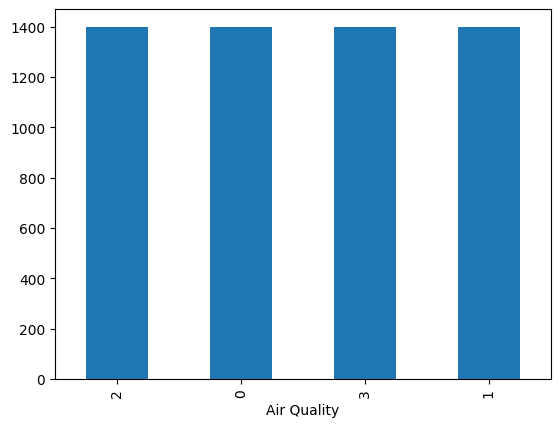

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Air Quality", axis = 1) # Variables predictoras
Y = data['Air Quality'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado
Y_train.value_counts().plot(kind='bar')# Objetivo del 70%

<Axes: xlabel='Air Quality'>

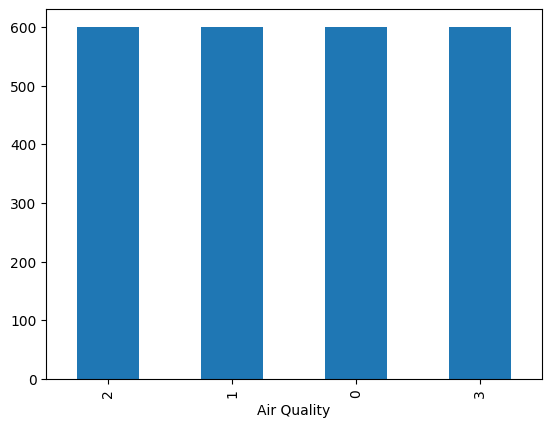

In [ ]:
#Variable objetivo del 30%
Y_test.value_counts().plot(kind='bar')# Objetivo del 30%

# 3. Aprendizaje con el 70%

**TREE**

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None) #gini, entropy
modelTree.fit(X_train, Y_train) #70% train

DecisionTreeClassifier(min_samples_leaf=2)

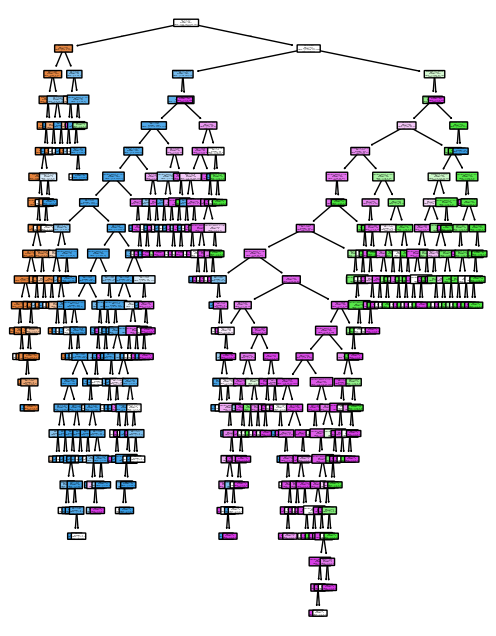

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8))
plot_tree(modelTree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

In [ ]:
#Evaluación 30%
from sklearn import metrics

Y_pred = modelTree.predict(X_test) #30% Test
print(Y_pred)

[2 2 1 ... 3 1 2]


In [ ]:
#Exactitud
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.9233333333333333


In [ ]:
#Matriz de confusion
from sklearn import metrics

cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
cm

array([[584,   0,  16,   0],
       [  0, 567,   3,  30],
       [ 16,   0, 549,  35],
       [  0,  42,  42, 516]])

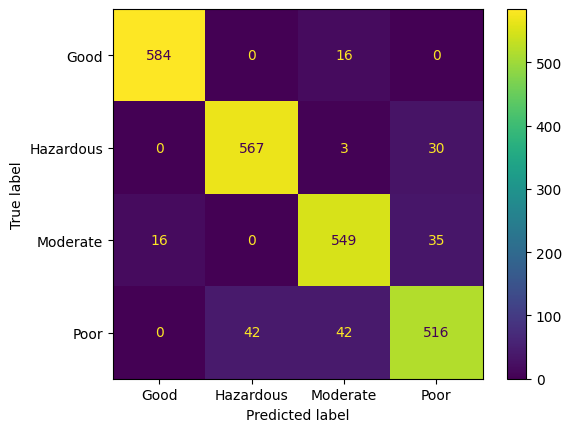

In [ ]:
#Plot de la matriz de confusion
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

In [ ]:
#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))

              precision    recall  f1-score   support

        Good       0.97      0.97      0.97       600
   Hazardous       0.93      0.94      0.94       600
    Moderate       0.90      0.92      0.91       600
        Poor       0.89      0.86      0.87       600

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



**RAMDOM FOREST**

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)
model_rf.fit(X_train, Y_train) #70%

RandomForestClassifier(max_samples=0.7, min_samples_leaf=2)

              precision    recall  f1-score   support

        Good       0.99      0.99      0.99       600
   Hazardous       0.96      0.97      0.96       600
    Moderate       0.96      0.96      0.96       600
        Poor       0.93      0.93      0.93       600

    accuracy                           0.96      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.96      0.96      0.96      2400



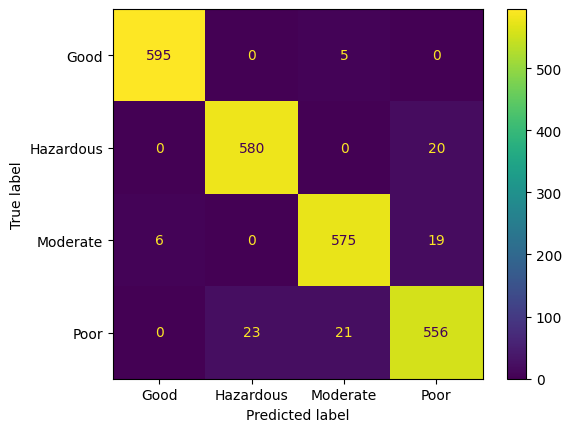

In [ ]:
#Evaluación de RandomForest con 30%
from sklearn import metrics

Y_pred = model_rf.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))



In [ ]:
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.9608333333333333


# **KNN**
Se debe normalizar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Variables a normalizar
cols_to_normalize = [
    'Temperature',
    'Humidity',
    'PM10',
    'NO2',
    'SO2',
    'CO',
    'Population_Density'
]

# Convertir X_train y X_test de nuevo a pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)  # Asumiendo que X es el DataFrame original
X_test = pd.DataFrame(X_test, columns=X.columns)  # Asumiendo que X es el DataFrame original

# Ajustar el scaler con los datos de entrenamiento
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train[cols_to_normalize])

# Transformar ambos conjuntos con el mismo scaler
X_train[cols_to_normalize] = min_max_scaler.transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = min_max_scaler.transform(X_test[cols_to_normalize])

# Verificar resultados
X_train.head()


,Unnamed: 0,Temperature,Humidity,PM10,NO2,SO2,CO,Population_Density
0,0.304951,0.380531,0.398480,0.026916,0.310284,0.273942,0.149007,0.396619
1,0.486497,0.362832,0.524430,0.044332,0.462766,0.316258,0.317881,0.413524
2,0.439860,0.280973,0.319218,0.029132,0.113475,0.104677,0.185430,0.068921
3,0.570893,0.254425,0.218241,0.089930,0.290780,0.229399,0.215232,0.460338
4,0.102776,0.371681,0.283388,0.150412,0.209220,0.327394,0.367550,0.501951


In [ ]:
#Aprendizaje KNN con 70%
from sklearn.neighbors  import KNeighborsClassifier #KNeighborsRegressor

modelKnn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')#euclidean, minkowski
modelKnn.fit(X_train, Y_train) #70%

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

              precision    recall  f1-score   support

        Good       0.97      0.99      0.98       600
   Hazardous       0.94      0.93      0.93       600
    Moderate       0.90      0.92      0.91       600
        Poor       0.88      0.85      0.86       600

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



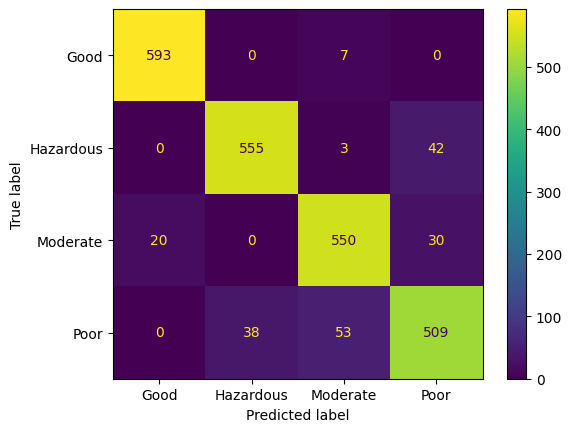

In [ ]:
#Evaluación de Knn con 30%
from sklearn import metrics

Y_pred = modelKnn.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))



In [ ]:
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.9195833333333333


**RED NEURONAL**

Se debe normalizar

In [ ]:
#Red Neuronal

from sklearn.neural_network import MLPClassifier #MLPRegressor

#Solo se configura capas ocultas, no se configura capa de entrada y de salida
modelNN = MLPClassifier(activation="logistic",hidden_layer_sizes=(5), learning_rate='constant',
                     learning_rate_init=0.2, momentum= 0.3, max_iter=500, random_state=3)

modelNN.fit(X_train, Y_train) #70% normalizados

MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=500, momentum=0.3,
              random_state=3)

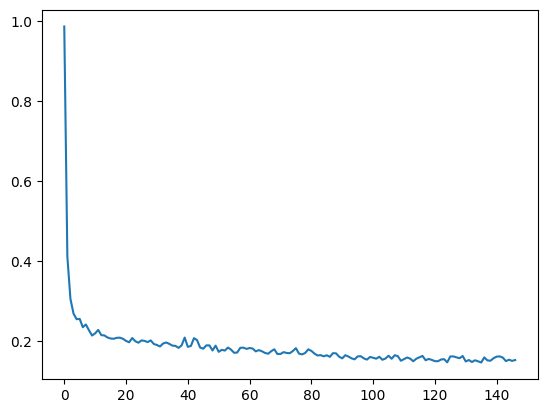

In [ ]:
#Loss es la desviación entre Y_train y el Y_pred
loss_values = modelNN.loss_curve_
plt.plot(loss_values)

              precision    recall  f1-score   support

        Good       0.99      0.99      0.99       600
   Hazardous       0.94      0.94      0.94       600
    Moderate       0.94      0.94      0.94       600
        Poor       0.90      0.90      0.90       600

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



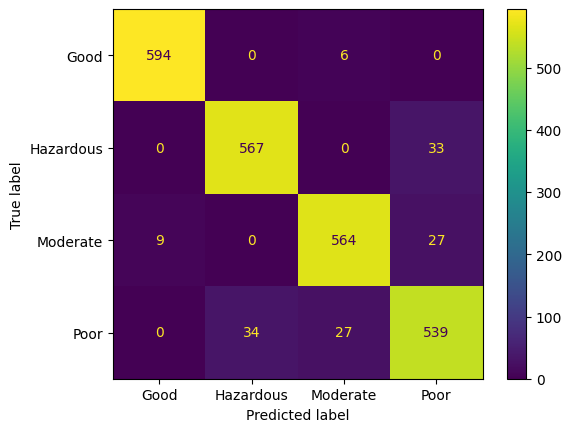

In [ ]:
#Evaluación de Red Neuronal
from sklearn import metrics

Y_pred = modelNN.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))


In [ ]:
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.9433333333333334


**SVM**

Se debe normalizar

In [ ]:
#SVM
from sklearn.svm import SVC # SVR

modelSVM = SVC(kernel='linear') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVM.fit(X_train, Y_train) #70%

SVC(kernel='linear')

              precision    recall  f1-score   support

        Good       0.98      0.99      0.99       600
   Hazardous       0.91      0.88      0.90       600
    Moderate       0.92      0.95      0.94       600
        Poor       0.85      0.85      0.85       600

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



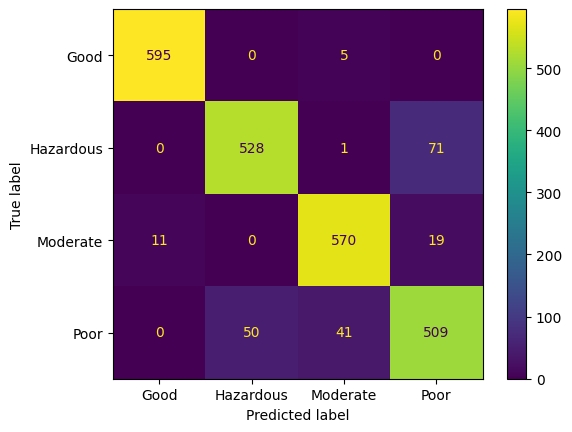

In [ ]:
#Evaluación de SVM
from sklearn import metrics

Y_pred = modelSVM.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labelencoder.classes_)
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=labelencoder.classes_))


In [ ]:
exactitud=metrics.accuracy_score(y_true=Y_test, y_pred=Y_pred)
print(exactitud)

0.9175


# 5. Guardamos el modelo

In [ ]:
#guardar el modelo de ranmdom forest que fue el mejor
import pickle
filename = 'modelo_rf.pkl'
variables= X.columns._values
pickle.dump([model_rf, labelencoder,variables,min_max_scaler], open(filename, 'wb'))

# COMPARACION

Comparamos todos los modelos por la exactitud y la mejor obtenida fue la de random forest que fue 0.9608333333333333

Arbol: 0.9233333333333333

KNN: 0.9195833333333333

Redes neuronales: 0.9433333333333334

SVM: 0.9175

# Hiperparametrización

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20, 30],    # Profundidad máxima
    'min_samples_split': [2, 5, 10],    # Mínimo muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],      # Mínimo muestras en hojas
    'max_features': ['sqrt', 'log2'],   # Número de features para split
    'bootstrap': [True, False]          # Método de muestreo
}

# Crear el modelo base
model_rf = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    cv=5,  # Validación cruzada de 5 folds
    n_jobs=-1,  # Usar todos los núcleos del CPU
    scoring='accuracy',
    verbose=2
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo optimizado en test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Métricas de evaluación
print("\nReporte de clasificación:")
print(classification_report(Y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(Y_test, y_pred))

# Importancia de características
importances = best_rf.feature_importances_
print("\nImportancia de características:")
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance:.4f}")